## predicting bitcoin close price using Multiple Linear Regression
                                           
###                                                            by soroush lotfi

bitcon price on different days is basically a huge amount of raw data.
we can use that data, as an exercise, to predict bitcoin's close price in tommorow using multiple linear regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df= pd.read_csv("Binance_BTCUSDT_d.csv")
df.head()

,https://www.CryptoDataDownload.com,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,unix,date,symbol,open,high,low,close,Volume BTC,Volume USDT,tradecount
1,1.64532E+12,2/20/2022 0:00,BTC/USDT,40079.17,40125.44,40044.01,40053.28,165.03317,6614115.743,6293
2,1.64523E+12,2/19/2022 0:00,BTC/USDT,39974.45,40444.32,39639.03,40079.17,18042.0551,721960636.1,586653
3,1.64514E+12,2/18/2022 0:00,BTC/USDT,40515.71,40959.88,39450,39974.44,43845.92241,1765622366,1025882
4,1.64506E+12,2/17/2022 0:00,BTC/USDT,43873.56,44164.71,40073.21,40515.7,47245.99494,1993400163,1067658


### we need to clean the data first

#### 1-naming rows and columns correctly

In [3]:
df. columns = df. iloc[0]
df=df.drop(0)
df.head()

,unix,date,symbol,open,high,low,close,Volume BTC,Volume USDT,tradecount
1,1.64532E+12,2/20/2022 0:00,BTC/USDT,40079.17,40125.44,40044.01,40053.28,165.03317,6614115.743,6293
2,1.64523E+12,2/19/2022 0:00,BTC/USDT,39974.45,40444.32,39639.03,40079.17,18042.0551,721960636.1,586653
3,1.64514E+12,2/18/2022 0:00,BTC/USDT,40515.71,40959.88,39450,39974.44,43845.92241,1765622366,1025882
4,1.64506E+12,2/17/2022 0:00,BTC/USDT,43873.56,44164.71,40073.21,40515.7,47245.99494,1993400163,1067658
5,1.64497E+12,2/16/2022 0:00,BTC/USDT,44544.85,44549.97,43307,43873.56,28471.8727,1250973502,823745


In [4]:
cdf=df[['date','open','high','low','close']]
cdf

,date,open,high,low,close
1,2/20/2022 0:00,40079.17,40125.44,40044.01,40053.28
2,2/19/2022 0:00,39974.45,40444.32,39639.03,40079.17
3,2/18/2022 0:00,40515.71,40959.88,39450,39974.44
4,2/17/2022 0:00,43873.56,44164.71,40073.21,40515.7
5,2/16/2022 0:00,44544.85,44549.97,43307,43873.56
...,...,...,...,...,...
1646,8/21/2017,4086.29,4119.62,3911.79,4016
1647,8/20/2017,4139.98,4211.08,4032.62,4086.29
1648,8/19/2017,4108.37,4184.69,3850,4139.98
1649,8/18/2017,4285.08,4371.52,3938.77,4108.37


In [5]:
cdf.describe()

,date,open,high,low,close
count,1650,1650,1650,1650,1650
unique,1650,1648,1598,1598,1648
top,2/20/2022 0:00,13500,9395,10080,6700
freq,1,2,3,3,2


#### 2-changing the type of prices from str to float

In [6]:
print(type(cdf['open'][1]))
print(type(cdf['high'][1]))

<class 'str'>
<class 'str'>


In [7]:

cdf['open']=pd.to_numeric(cdf['open'])
cdf['high']=pd.to_numeric(cdf['high'])
cdf['low']=pd.to_numeric(cdf['low'])
cdf['close']=pd.to_numeric(cdf['close'])
# cdf['tomorrowClose']=pd.to_numeric(cdf['tomorrowClose'])

print(type(cdf['open'][1]))
print(type(cdf['high'][1]))

<class 'numpy.float64'>
<class 'numpy.float64'>


C:\Users\Dotcom\AppData\Local\Temp/ipykernel_11164/4011343281.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cdf['open']=pd.to_numeric(cdf['open'])
C:\Users\Dotcom\AppData\Local\Temp/ipykernel_11164/4011343281.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cdf['high']=pd.to_numeric(cdf['high'])
C:\Users\Dotcom\AppData\Local\Temp/ipykernel_11164/4011343281.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = valu

#### 3-creating a column named "tomorrowPrice" so we can analyse the price easier

In [8]:
cdf['tomorrowClose']=cdf["close"]
cdf['tomorrowClose']=cdf['tomorrowClose'].shift(+1)
cdf=cdf.drop(1)
cdf=cdf.reset_index()
del cdf['index']
cdf

C:\Users\Dotcom\AppData\Local\Temp/ipykernel_11164/1071607004.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cdf['tomorrowClose']=cdf["close"]
C:\Users\Dotcom\AppData\Local\Temp/ipykernel_11164/1071607004.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cdf['tomorrowClose']=cdf['tomorrowClose'].shift(+1)


,date,open,high,low,close,tomorrowClose
0,2/19/2022 0:00,39974.45,40444.32,39639.03,40079.17,40053.28
1,2/18/2022 0:00,40515.71,40959.88,39450.00,39974.44,40079.17
2,2/17/2022 0:00,43873.56,44164.71,40073.21,40515.70,39974.44
3,2/16/2022 0:00,44544.85,44549.97,43307.00,43873.56,40515.70
4,2/15/2022 0:00,42535.94,44751.40,42427.03,44544.86,43873.56
...,...,...,...,...,...,...
1644,8/21/2017,4086.29,4119.62,3911.79,4016.00,4040.00
1645,8/20/2017,4139.98,4211.08,4032.62,4086.29,4016.00
1646,8/19/2017,4108.37,4184.69,3850.00,4139.98,4086.29
1647,8/18/2017,4285.08,4371.52,3938.77,4108.37,4139.98


In [9]:
cdf.isnull().sum()

0
date             0
open             0
high             0
low              0
close            0
tomorrowClose    0
dtype: int64

### now data is ready to be used !

array([[<AxesSubplot:title={'center':'open'}>,
        <AxesSubplot:title={'center':'high'}>],
       [<AxesSubplot:title={'center':'low'}>,
        <AxesSubplot:title={'center':'close'}>],
       [<AxesSubplot:title={'center':'tomorrowClose'}>, <AxesSubplot:>]],
      dtype=object)

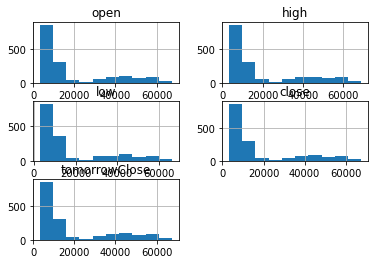

In [10]:
cdf.hist()

In [11]:
msk = np.random.rand(len(cdf)) < 0.8
train = cdf[msk]
test = cdf[~msk]
train

,date,open,high,low,close,tomorrowClose
0,2/19/2022 0:00,39974.45,40444.32,39639.03,40079.17,40053.28
1,2/18/2022 0:00,40515.71,40959.88,39450.00,39974.44,40079.17
3,2/16/2022 0:00,44544.85,44549.97,43307.00,43873.56,40515.70
4,2/15/2022 0:00,42535.94,44751.40,42427.03,44544.86,43873.56
5,2/14/2022 0:00,42053.65,42842.40,41550.56,42535.94,44544.86
...,...,...,...,...,...,...
1643,8/22/2017,4016.00,4104.82,3400.00,4040.00,4114.01
1645,8/20/2017,4139.98,4211.08,4032.62,4086.29,4016.00
1646,8/19/2017,4108.37,4184.69,3850.00,4139.98,4086.29
1647,8/18/2017,4285.08,4371.52,3938.77,4108.37,4139.98


In [12]:
test

,date,open,high,low,close,tomorrowClose
2,2/17/2022 0:00,43873.56,44164.71,40073.21,40515.70,39974.44
9,2/10/2022 0:00,44372.71,45821.00,43174.01,43495.44,42373.73
12,2/7/2022 0:00,42380.87,44500.50,41645.85,43839.99,44042.99
24,1/26/2022 0:00,36958.32,38919.98,36234.63,36809.34,37160.10
34,1/16/2022 0:00,43084.29,43475.00,42581.79,43071.66,42201.62
...,...,...,...,...,...,...
1605,9/29/2017,4174.50,4263.86,3952.01,4174.69,4378.51
1610,9/24/2017,3780.00,3789.99,3622.76,3660.02,3920.75
1627,9/7/2017,4619.77,4788.59,4438.19,4691.61,4282.80
1633,9/1/2017,4724.89,4885.55,4654.88,4834.91,4472.14


In [13]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
x = np.asanyarray(train[['open','close','high','low']])
y = np.asanyarray(train[['tomorrowClose']])
regr.fit (x, y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ("intercept: ",regr.intercept_)

Coefficients:  [[ 0.10475319  1.15642806 -0.15718597 -0.10522974]]
intercept:  [66.87901]


In [14]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['open','close','high','low']])
test_y = np.asanyarray(test[['tomorrowClose']])
test_y_ = regr.predict(test_x)




In [15]:


print("Mean absolute error: " , np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): " , np.mean((test_y_ - test_y)**2))
print("R2-score: " , r2_score(test_y , test_y_) )

Mean absolute error:  545.9458661122316
Residual sum of squares (MSE):  1012621.7496993196
R2-score:  0.9963816446019338


### R2 score is significantly high because most of the days, price does not change that much, so if we guess a number for tomorrow's price near today's price, with a high chance we'll be correct
### we can compare the price calculated by the model with the actual result to confirm our theory
### let's check the price for "2/15/2022 0:00"

In [16]:
cdf

,date,open,high,low,close,tomorrowClose
0,2/19/2022 0:00,39974.45,40444.32,39639.03,40079.17,40053.28
1,2/18/2022 0:00,40515.71,40959.88,39450.00,39974.44,40079.17
2,2/17/2022 0:00,43873.56,44164.71,40073.21,40515.70,39974.44
3,2/16/2022 0:00,44544.85,44549.97,43307.00,43873.56,40515.70
4,2/15/2022 0:00,42535.94,44751.40,42427.03,44544.86,43873.56
...,...,...,...,...,...,...
1644,8/21/2017,4086.29,4119.62,3911.79,4016.00,4040.00
1645,8/20/2017,4139.98,4211.08,4032.62,4086.29,4016.00
1646,8/19/2017,4108.37,4184.69,3850.00,4139.98,4086.29
1647,8/18/2017,4285.08,4371.52,3938.77,4108.37,4139.98


In [17]:
row=cdf.loc[cdf['date']=='2/15/2022 0:00']
row

,date,open,high,low,close,tomorrowClose
4,2/15/2022 0:00,42535.94,44751.4,42427.03,44544.86,43873.56


In [18]:
i=row.index[0]
res=regr.predict([[cdf['open'][i],cdf['high'][i],cdf['low'][i],cdf["close"][i]]])
res

array([[44918.05149086]])